In [95]:
# ! pip install xgboost
# ! pip install lightgbm

In [96]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from lightgbm import LGBMRegressor

In [78]:
train = pd.read_excel('아버지아들키.xlsx', sheet_name='train')
test = pd.read_excel('아버지아들키.xlsx', sheet_name='test')

In [79]:
X_train = train["Father"]
y_train = train["Son"]

X_test = test["Father"]
y_test = test["Son"]


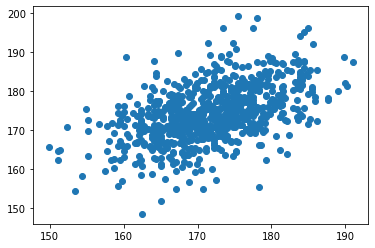

In [80]:
plt.scatter(X_train, y_train)

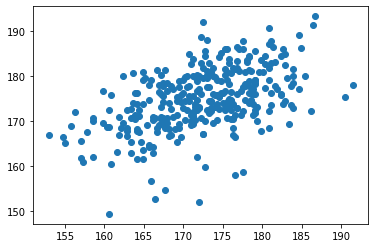

In [81]:
plt.scatter(X_test, y_test)

In [82]:
X_train = X_train.to_numpy().reshape(-1,1)
X_test = X_test.to_numpy().reshape(-1,1)


In [148]:
model1 = LinearRegression()
model2 = KNeighborsRegressor(n_neighbors=60)
model3 = DecisionTreeRegressor()
model4 = RandomForestRegressor()
model5 = GradientBoostingRegressor()
model6 = xgb.XGBRegressor()
model7 = LGBMRegressor()

In [149]:
model1.fit(X_train,y_train)
model2.fit(X_train,y_train)
model3.fit(X_train,y_train)
model4.fit(X_train,y_train)
model5.fit(X_train,y_train)
model6.fit(X_train,y_train)
model7.fit(X_train,y_train)

LGBMRegressor()

In [150]:
# 소프트 보팅 
# 각 변수에 예측값 저장
predict1 = model1.predict(X_test)
predict2 = model2.predict(X_test)
predict3 = model3.predict(X_test)
predict4 = model4.predict(X_test)
predict5 = model5.predict(X_test)
predict6 = model6.predict(X_test)
predict7 = model7.predict(X_test)

In [151]:
# 테스트 평가
print("선형회귀 모델 성능: ", r2_score(y_test,predict1))
print("KNN 모델 성능: ", r2_score(y_test,predict2))
print("의사 결정 나무 모델 성능: ", r2_score(y_test,predict3))
print("랜덤 포레스트 모델 성능: ", r2_score(y_test,predict4))
print("그래디언트 부스트 모델 성능: ", r2_score(y_test,predict5))
print("XGB 모델 성능: ", r2_score(y_test,predict6))
print("LGB 모델 성능: ", r2_score(y_test,predict7))


선형회귀 모델 성능:  0.2519977905846619
KNN 모델 성능:  0.24987468282828385
의사 결정 나무 모델 성능:  0.07133438875422093
랜덤 포레스트 모델 성능:  0.12078502202459906
그래디언트 부스트 모델 성능:  0.18554360914749402
XGB 모델 성능:  0.07841681998519068
LGB 모델 성능:  0.18113480901854329


In [152]:
# train 평가 (과대적합 확인)
pred1 = model1.predict(X_train)
pred2 = model2.predict(X_train)
pred3 = model3.predict(X_train)
pred4 = model4.predict(X_train)
print("선형회귀 모델 성능: ", r2_score(y_train,pred1))
print("KNN 모델 성능: ", r2_score(y_train,pred2))
print("그래디언트 부스팅 모델 성능: ", r2_score(y_train,pred3))
print("XGB 모델 성능: ", r2_score(y_train,pred4))

선형회귀 모델 성능:  0.24967004992776776
KNN 모델 성능:  0.25248472080082773
그래디언트 부스팅 모델 성능:  0.37981060494153207
XGB 모델 성능:  0.37213288971085234


In [153]:
# 예측치들의 평균 사용
avg_predict = (predict1 + predict2 + predict3) /3
print("평균 성능: ", r2_score(y_test,avg_predict))

평균 성능:  0.23153969729322266


In [154]:
# 예측치들의 가중 평균
avg_predict2 = ((24*predict1) + (25*predict2) + (9*predict3)) / 58
print("평균 성능: ", r2_score(y_test,avg_predict2))


평균 성능:  0.24815741528726543


In [155]:
# 각 모델의 분산
# 평균을 사용하면 분산이 낮아짐 (중심극한 정리)
print(np.cov(predict1))
print(np.cov(predict2))
print(np.cov(predict3))
print(np.cov(avg_predict))
print(np.cov(avg_predict2))

13.020016090787738
11.436993731777427
18.70637762177803
12.434068980443966
12.00803296995852


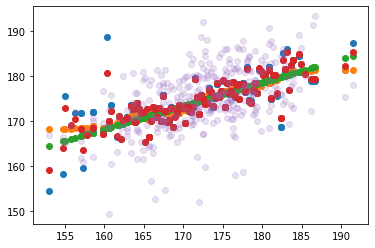

In [156]:
plt.scatter(X_test,predict3)
plt.scatter(X_test,predict2)
plt.scatter(X_test,predict1)
plt.scatter(X_test,predict4)
plt.scatter(X_test,y_test, alpha=0.2)

plt.show()

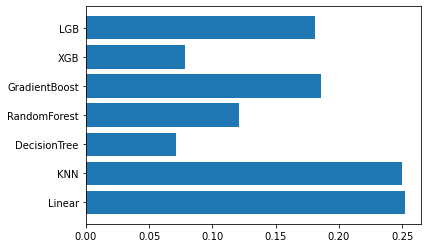

In [162]:
score = [r2_score(y_test,predict1),r2_score(y_test,predict2),r2_score(y_test,predict3),
         r2_score(y_test,predict4),r2_score(y_test,predict5),r2_score(y_test,predict6),r2_score(y_test,predict7)]
col = ["Linear","KNN","DecisionTree","RandomForest","GradientBoost","XGB","LGB"]

plt.barh(col,score)
plt.show()
